## MANUAL NEURAL NETWORK CREATION

### OPERATION CLASS

In [37]:
class Operation():
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [38]:
class add(Operation):
    
    def __init__(self, x, y):
         
        super().__init__([x, y])

    def compute(self, x_var, y_var):
         
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [39]:
class multiply(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_var, b_var):
         
        self.inputs = [a_var, b_var]
        return a_var * b_var

In [40]:
class matmul(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_mat, b_mat):
         
        self.inputs = [a_mat, b_mat]
        return a_mat.dot(b_mat) #assuming its an numpy array

In [41]:
class Placeholder():
    """
    A placeholder is a node that needs to be provided a value for computing the output in the Graph.
    """
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [42]:
class Variable():
    """
    This variable is a changeable parameter of the Graph.
    """
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
         
        _default_graph.variables.append(self)

In [43]:
class Graph():
    
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        """
        Sets this Graph instance as the Global Default Graph
        """
        global _default_graph
        _default_graph = self

Z = Ax + B

A = 10
b = 1

z = 10x + 1

In [44]:
g = Graph()

In [45]:
g.set_as_default()

In [46]:
A = Variable(10)

In [47]:
b = Variable(1)

In [48]:
x = Placeholder()

In [49]:
y = multiply(A,x)

In [50]:
z = add(y,b)

In [51]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [52]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output


In [53]:
sess = Session()
result = sess.run(operation = z,feed_dict= {x:10})

In [54]:
result

101

In [55]:
import numpy as np
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,1])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

sess = Session()
result = sess.run(operation=z,feed_dict={x:10})
result

array([[101, 201],
       [301, 401]])

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [58]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

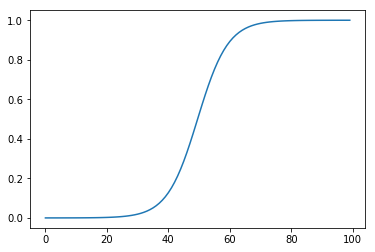

In [59]:
plt.plot(sample_a)

In [60]:
class Sigmoid(Operation):
 
    
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        
        return 1/(1+np.exp(-z_val))
    

In [61]:
from sklearn.datasets import make_blobs

In [62]:
data = make_blobs(n_samples=100, n_features=2,centers=2 , random_state= 75)

In [63]:
type(data)

tuple

In [64]:
features = data[0]
labels = data[1]

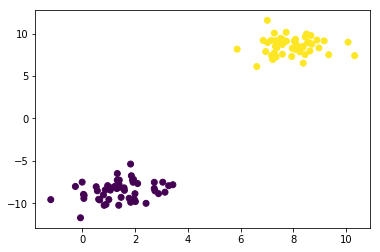

In [65]:
plt.scatter(features[:,0],features[:,1],c = labels)

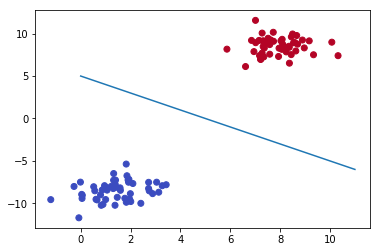

In [66]:
# DRAW A LINE THAT SEPERATES CLASSES
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

## Defining the Perceptron

$$ y = mx + b $$

$$ y = -x + 5 $$

$$ f1 = mf2 + b , m=1$$

$$ f1 = -f2 + 5 $$

$$ f1 + f2 - 5 = 0 $$

### Convert to a Matrix Representation of Features

$$ w^Tx + b = 0 $$

$$   \Big(1, 1\Big)f - 5 = 0 $$

Then if the result is > 0 its label 1, if it is less than 0, it is label=0




### Example Point

Let's say we have the point f1=2 , f2=2 otherwise stated as (8,10). Then we have:

$$ 
\begin{pmatrix} 
1 , 1
\end{pmatrix} 
\begin{pmatrix} 
8 \\
10
\end{pmatrix} + 5 =  $$

In [67]:
np.array([1, 1]).dot(np.array([[8],[10]])) - 5

array([13])

In [68]:
np.array([1,1]).dot(np.array([[4],[-10]])) - 5

array([-11])

### Using an Example Session Graph

In [69]:
g = Graph()

In [ ]:
g.set_as_default()

x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x),b)
a = Sigmoid(z)
sess = Session()